In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torchvision

## Classifying MNIST handwritten digits

In [2]:
# The most basic code to load MNIST dataset
# Only the path for the folder containing data is provided.
# Note that './data' is the parent folder of the data folder, called MNIST
# We must use './data', not './data/MNIST'
mnist_dataset = torchvision.datasets.MNIST(
    root='./data',
)

In [3]:
# Basic information of the dataset
mnist_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train

In [4]:
# The first example in this dataset
# The first is an image containing a handwritten digit.
# The second is its label, i.e., the number.
mnist_dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [5]:
image = mnist_dataset[0][0]
label = mnist_dataset[0][1]

Text(0.5, 1.0, '5')

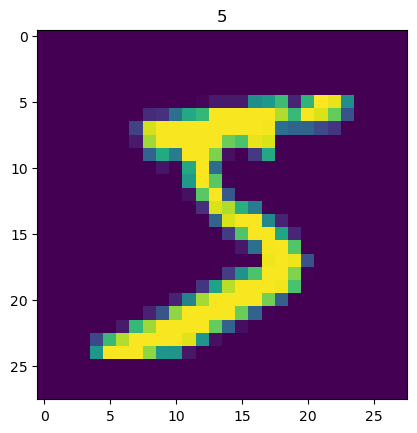

In [6]:
# Show the image
fig = plt.figure()
ax = fig.add_subplot(111)

# ax.imshow accepts PIL images, so we can direct pass 'image' to this function.
ax.imshow(image)
ax.set_title(f'{label}')

In [7]:
# To see the color value of the first image
mnist_dataset.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

Text(0.5, 1.0, '5')

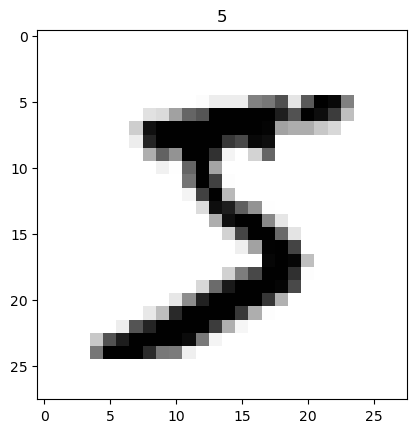

In [8]:
# Use grey scale
# Show the image
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(image, cmap='gray_r')
ax.set_title(f'{label}')

In [9]:
# More options to load the data
mnist_dataset = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
)
# By default, train=True. Above, we set train=False, which load the test data.
# By default, download=False, i.e., the data won't be downloaded automatically.
# If the data has been downloaded, setting download=True won't download the data again.

In [10]:
mnist_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test

In [11]:
# Transform data while creating the dataset

# torchvision.transforms.Compose: similar to pipeline in sklearn, this groups a series of transforms together
# torchvision.transforms.ToTensor: Converts a PIL Image in the range [0, 255] to a torch.FloatTensor in the range [0.0, 1.0]
# Note the scaling done by ToTensor.
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])
mnist_dataset = torchvision.datasets.MNIST(
    root='./data',
    transform=transform
)

In [12]:
# We can see that the image data is rescaled to [0, 1]
mnist_dataset[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [13]:
# Note that the dimension of the image is 3
# The first dimension corresponds to the color channels
mnist_dataset[0][0].shape

torch.Size([1, 28, 28])

In [14]:
# The codes from the book
# Download the data set online

transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

mnist_dataset_train = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform = transform
)

mnist_dataset_test = torchvision.datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform = transform
)

In [15]:
# dataloader
batch_size = 64
torch.manual_seed(1)
dataloader_train = torch.utils.data.DataLoader(mnist_dataset_train, 
                                               batch_size=batch_size, 
                                               shuffle=True)

In [16]:
# The original data of an image, even after transfored, is still a 2D tensor
# In order to feed it to a network, we need to flatten it into a 1D tensor
# We use torch.nn.Flatten() to do this
# Note that torch.nn.Flatten() regards the first dimension as the index of an example
# It starts flattening only from the second dimension
x = mnist_dataset_train[0][0]
torch.nn.Flatten()(x).shape

torch.Size([1, 784])

In [17]:
# torch.nn.Flatten can handle multiple images together
x = torch.cat([mnist_dataset_train[0][0], mnist_dataset_train[1][0]], dim=0)
torch.nn.Flatten()(x).shape

torch.Size([2, 784])

In [18]:
# Model

image_size = mnist_dataset_train[0][0].shape
input_size = image_size[0] * image_size[1] * image_size[2]

output_size = 10

model = torch.nn.Sequential(torch.nn.Flatten(),
                            torch.nn.Linear(input_size, 32),
                            torch.nn.ReLU(),
                            torch.nn.Linear(32, 16),
                            torch.nn.ReLU(),
                            torch.nn.Linear(16, output_size))
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=32, bias=True)
  (2): ReLU()
  (3): Linear(in_features=32, out_features=16, bias=True)
  (4): ReLU()
  (5): Linear(in_features=16, out_features=10, bias=True)
)

In [33]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epoch = 20

num_example_train = len(mnist_dataset_train)

accuracy_history_train = []

for epoch in range(num_epoch):
    accuracy_train = 0
    for X_batch, y_batch in dataloader_train:
        # Unlike previous implementation, we do not use model(X_batch)[:, 0] here.
        # The reason is that model(X_batch) itself gives the desired shape
        # The loss function, torch.nn.CrossEntropyLoss(), require that the first argument having
        # shape of (num_examples, num_classes), and the second argument having (num_examples,)
        # Note that the second argument contains class labels, which is not one-hot, but it 
        # should begin from 0 to num_classes-1
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        # torch.argmax: the index of 
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_train += is_correct.sum()
    accuracy_train /= num_example_train
    accuracy_history_train.append(accuracy_train)
    print(f'Epoch {epoch}, Accuracy {accuracy_train}')

Epoch 0, Accuracy 0.9864333271980286
Epoch 1, Accuracy 0.9871833324432373
Epoch 2, Accuracy 0.9879833459854126
Epoch 3, Accuracy 0.9880666732788086
Epoch 4, Accuracy 0.9894999861717224
Epoch 5, Accuracy 0.9892500042915344
Epoch 6, Accuracy 0.9894499778747559
Epoch 7, Accuracy 0.9900166392326355
Epoch 8, Accuracy 0.9908999800682068
Epoch 9, Accuracy 0.9917166829109192
Epoch 10, Accuracy 0.9908999800682068
Epoch 11, Accuracy 0.9920499920845032
Epoch 12, Accuracy 0.9919833540916443
Epoch 13, Accuracy 0.9922333359718323
Epoch 14, Accuracy 0.9920666813850403
Epoch 15, Accuracy 0.9933500289916992
Epoch 16, Accuracy 0.993233323097229
Epoch 17, Accuracy 0.993399977684021
Epoch 18, Accuracy 0.9936333298683167
Epoch 19, Accuracy 0.9936333298683167


In [34]:
# Test accuracy
pred = model(mnist_dataset_test.data/255.0)
is_correct = (torch.argmax(pred, dim=1) == mnist_dataset_test.targets).float()
accuracy_test = is_correct.mean()
print(f'Test accuracy: {accuracy_test}')

Test accuracy: 0.9670000076293945
